In [34]:
import io
import nltk, re, pprint
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [35]:
# We access the data set
f = open("Happiness.txt")
lines = f.readlines()
# We only want the lines corresponding to the words
lines = lines[4:]
# We create a list of the words and another containing their average happiness rank
sentimentWords = lines[:]
sentimentLevels = lines[:]
c = len(lines)
for i in range(c):
    s = lines[i].split()
    sentimentWords[i] = s[0]
    sentimentLevels[i] = float(s[2])

In [36]:
# We now create the function
def sentiment(word):
    # We keep track of the total happiness rankings of the tokens and how many of them are applicable
    if word.lower() in sentimentWords:
        i = sentimentWords.index(word.lower())
        return sentimentLevels[i]
    else:
        return 0


In [37]:
# We define a function that takes all the tokens and the window size.
# It returns a list of profiles for each moving average window.
def sentProfs(tokens, profSize, isOneSection):
    #Create a list for the average happiness level of each window
    sentProfiles = []
    currentWindow = []
    hapWinTot = 0
    first = sentiment(tokens[0])
    zeros = 0
    tokenLen = len(tokens)
    #First set of values
    for i in range(profSize):
        n = sentiment(tokens[i])
        hapWinTot += n
        currentWindow.append(n)
        if(n == 0):
            zeros += 1
    
    if(isOneSection):
        return hapWinTot/(profSize - zeros)
    
    sentProfiles.append(hapWinTot/(profSize - zeros))

    
    for i in range(profSize,tokenLen):
        if(currentWindow[0] == 0):
            zeros -= 1
        else:
            hapWinTot -= currentWindow[0]
        currentWindow.pop(0)
        
        n = sentiment(tokens[i])
        hapWinTot += n
        currentWindow.append(n)
        if(n == 0):
            zeros += 1
            
        if(zeros == profSize):
            print "Whole window with no applicable words"
            continue
            
        sentProfiles.append(hapWinTot/(profSize - zeros))
        if(hapWinTot/(profSize - zeros) < 2.84):
            print currentWindow
        
  
    return sentProfiles


In [101]:
fotr_words = [word for line in open('LOTR_Fotr.txt', 'r') for word in line.split()]
tt_words = [word for line in open('LOTR_ttt.txt', 'r') for word in line.split()]
rotk_words = [word for line in open('LOTR_rotk.txt', 'r') for word in line.split()]
All_words = fotr_words[:]
All_words.extend(tt_words)
All_words.extend(rotk_words)
len(fotr_words)

185874

In [8]:
shortWords = words[30000:40000]

In [118]:
#sp = sentProfs(words, 500)
sp10 = sentProfs(words, 10, bool(0))

Whole window with no applicable words
Whole window with no applicable words
Whole window with no applicable words
[0, 0, 0, 0, 0, 2.2, 0, 0, 0, 3.48]
[0, 0, 0, 0, 2.2, 0, 0, 0, 3.48, 0]
Whole window with no applicable words
Whole window with no applicable words
Whole window with no applicable words
Whole window with no applicable words
Whole window with no applicable words
Whole window with no applicable words
Whole window with no applicable words
Whole window with no applicable words
Whole window with no applicable words
Whole window with no applicable words


In [43]:
shortWords

['PROLOGUE',
 'This',
 'book',
 'is',
 'largely',
 'concerned',
 'with',
 'Hobbits,',
 'and',
 'from',
 'its',
 'pages',
 'a',
 'reader',
 'may',
 'discover',
 'much',
 'of',
 'their',
 'character',
 'and',
 'a',
 'little',
 'of',
 'their',
 'history.',
 'Further',
 'information',
 'will',
 'also',
 'be',
 'found',
 'in',
 'the',
 'selection',
 'from',
 'the',
 'Red',
 'Book',
 'of',
 'Westmarch',
 'that',
 'has',
 'already',
 'been',
 'published,',
 'under',
 'the',
 'title',
 'of',
 '_The',
 'Hobbit_.',
 'That',
 'story',
 'was',
 'derived',
 'from',
 'the',
 'earlier',
 'chapters',
 'of',
 'the',
 'Red',
 'Book,',
 'composed',
 'by',
 'Bilbo',
 'himself,',
 'the',
 'first',
 'Hobbit',
 'to',
 'become',
 'famous',
 'in',
 'the',
 'world',
 'at',
 'large,',
 'and',
 'called',
 'by',
 'him',
 '_There',
 'and',
 'Back',
 'Again,_',
 'since',
 'they',
 'told',
 'of',
 'his',
 'journey',
 'into',
 'the',
 'East',
 'and',
 'his',
 'return:',
 'an',
 'adventure',
 'which',
 'later',
 'invol

In [11]:
sentiment("this")

5.06

In [71]:
sentProfiles_15 = sentProfs(text8.tokens, 15)

In [12]:
plt.figure(1)
plt.plot(sp)
plt.ylabel('Happiness Rating')
plt.xlabel('Window Position in Text')
plt.axis([0, 200000, 3, 8])
plt.title("Window Size - 15")


plt.figure(2)
plt.plot(sp10)
plt.ylabel('Happiness Rating')
plt.xlabel('Window Position in Text')
plt.axis([0, 200000, 2, 8])
plt.title("Window Size - 15")

plt.show()

In [94]:
sp10.index(min(sp10))

35889

In [100]:
min(sp10)

2.839999999999783

In [123]:
def charSent(char1, char2):
    indices1 = [i for i, x in enumerate(All_words) if x == char1]    
    indices2 = [i for i, x in enumerate(All_words) if x == char2]
    
    sentWindow = 500
    rad = int(sentWindow/2)
    encounters = []
    encountersi = []
    for i in indices1:
        for j in range(i-rad,  i+rad):
            if j in indices2:
                encounters.append(sentProfs(All_words[i-rad : i+rad], sentWindow, bool(1)))
                encountersi.append(i)
                break
    #print encounters
    return [encountersi, encounters]
        

In [127]:
FrodoSamProf = charSent("Frodo","Sam")
FrodoGandalfProf = charSent("Frodo","Gandalf")


In [124]:
FrodoSmeagolProf = charSent("Frodo","Sm\xe9agol")
FrodoGollumProf = charSent("Frodo","Gollum")


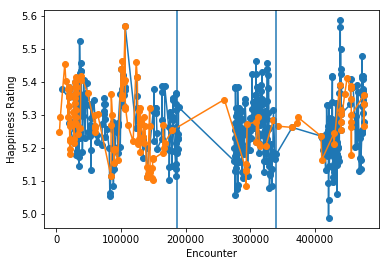

In [125]:
plt.figure(1)
plt.plot(FrodoSamProf[0],FrodoSamProf[1],'-o')
plt.plot(FrodoGandalfProf[0],FrodoGandalfProf[1],'-o')
plt.ylabel('Happiness Rating')
plt.xlabel('Encounter')
#plt.axis([0, len(FrodoSamProf)+1, 2, 8])
#plt.title("Window Size - 15")
plt.axvline(x=len(fotr_words))
plt.axvline(x=len(fotr_words+tt_words))
plt.show()

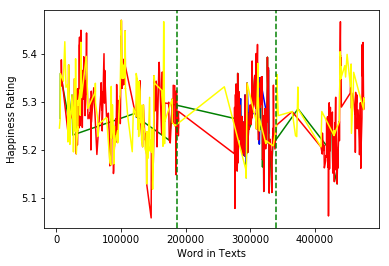

In [129]:
plt.figure(1)
plt.plot(FrodoGollumProf[0],FrodoGollumProf[1],color='green')
plt.plot(FrodoSmeagolProf[0],FrodoSmeagolProf[1],color='blue')
plt.plot(FrodoSamProf[0],FrodoSamProf[1],color='red')
plt.plot(FrodoGandalfProf[0],FrodoGandalfProf[1],color='yellow')
plt.ylabel('Happiness Rating')
plt.xlabel('Word in Texts')
#plt.axis([270000, 340000, 5, 5.5])
#plt.title("Window Size - 15")
plt.axvline(x=len(fotr_words), color='green',linestyle='--')
plt.axvline(x=len(fotr_words+tt_words), color='green',linestyle='--')
plt.show()

In [106]:
tt_words.index("Sm\xe9agol")

87925